# Домашняя работа 9. Деревья решений. (32 балла)

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

## Полезная литература

- [Habrahabr: ODS деревья решений](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy)
- [ВМК МГУ семинары по решающим деревьям](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem04_trees.pdf)
- [Sklearn Decision Trees](http://scikit-learn.org/stable/modules/tree.html)

## 1. Сравнение моделей деревьев

В этом блоке вы сравните разные конфигурации композиций деревьев:
- DecisionTree
- Bagging
- Bagging с другими настройками подбора признаков для разбиения
- RandomForest

Будем использовать [датасет с винишком](https://archive.ics.uci.edu/ml/datasets/wine+quality) - это задача то ли классификации то ли регресси - нужно предсказывать качество вина. Будем думать что это классификация.

![](https://upload.wikimedia.org/wikipedia/en/thumb/7/7c/Lulz_Security.svg/300px-Lulz_Security.svg.png)

### 1.1 Чтение данных (1 балла)

Данные лежат как обычно в `'../../data/winequality-red.csv.gz'`.

- Прочитайте их с помощью pandas
- нарисуйте countplot целевого признака `quality`.
- Что вы думаете по поводу количества представителей каждого класса.
- Разбейте данные на X и y.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [3]:
df = pd.read_csv('/home/rimsky/Projects/ml-solutions/ml_course/data/data_winequality-red.csv.gz', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


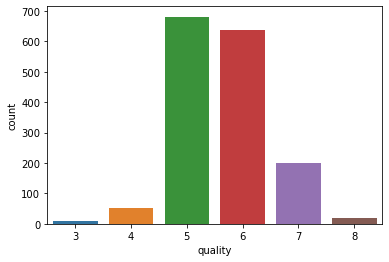

In [4]:
sns.countplot(data=df, x='quality')

In [84]:
X = df.drop(columns=['quality'])
y = df['quality']

В классах качества вина виден явный перекос в сторону 5 и 6 класса. Выборка не сбалансирована по целевому признаку

### 1.2 Сравнение моделей (4 балла)

Задача классификации. Все признаки уже числовые. Значит можно пробовать просто все модели и выбрать лучшую. Так и поступим, сделайте кросс валидацию на 5 фолдах, используя `sklearn.model_selection.KFold` как аргумент у `cross_val_score`. Метрика качества будет `accuracy`.

Алгоритмы для тестирования:
- KNeighborsClassifier с 10 соседями
- KNeighborsClassifier с 10 соседями и масштабированием StandartScaler
- RidgeClassifier
- DecisionTreeClassifier 
- BaggingClassifier c 100 деревьев
- BaggingClassifier с 100 деревьев и каждое дерево обучается только по половине случайно выбранных признаков (см аргументы)
- RandomForestClassifier c 100 деревьев

Выведите среднее значение метрики качества для каждого из классификаторов. 

**hint**: каждый следующий алгоритм, будет показывать качество лучше, чем предыдущий. Если у вас не так - то что-то вы делаете неправильно. Везде зафиксируйте random_state=42.

In [88]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [89]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [90]:
score = cross_val_score(KNeighborsClassifier(n_neighbors=10), X, y, cv=cv, scoring='accuracy')
print(score.std())
print(score.mean())

0.02646141016093271
0.5122198275862069


In [91]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [99]:
from sklearn.preprocessing import StandardScaler

data = StandardScaler().fit_transform(X)

score = cross_val_score(KNeighborsClassifier(n_neighbors=10), data, y, cv=cv, scoring='accuracy')
print(score.std())
print(score.mean())

0.014703387246407617
0.5797531347962382


In [100]:
score = cross_val_score(RidgeClassifier(random_state=42), X, y, cv=cv, scoring='accuracy')
print(score.std())
print(score.mean())

0.03996649901617024
0.5835384012539185


In [101]:
score = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=cv, scoring='accuracy')
print(score.std())
print(score.mean())

0.03363095895166169
0.6178957680250783


In [102]:
score = cross_val_score(BaggingClassifier(n_estimators=100, random_state=42), X, y, cv=cv, scoring='accuracy')
print(score.std())
print(score.mean())

0.03544718018769351
0.697966300940439


In [103]:
score = cross_val_score(BaggingClassifier(n_estimators=100, max_features=X.shape[1] // 2 + 1,  random_state=42), X, y, cv=cv, scoring='accuracy')
print(score.std())
print(score.mean())

0.025289913402043562
0.696087382445141


In [104]:
score = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X, y, cv=cv, scoring='accuracy')
print(score.std())
print(score.mean())

0.02872158354161314
0.7017143416927899


### 1.3 Расуждения (8 баллов)

Ответьте на вопросы развернуто, можете полистать литературу:

- почему наблюдается значимая разница в качестве у KNeighborsClassifier с масштабированием и без
- почему масштабирование не важно для деревьев решений
- почему бэггинг на половине признаков для каждого дерева дал качество предсказания больше, чем на всех? (а он дал!)
- у какой модели наибольшей отклонение от среднего качества предсказаний? А почему??

1) KNN - метрический алгоритм, который вычисляет расстояние между объектами, поэтому он лучше работает с отмасштабированными признаками

2) потому что мы по сути работаем с набором условий - да/нет, при этом, в единицу времени мы рассматриваем только один признак на вопрос выполнения условия. 1 признак - 1 разбиение. Тут масштаб нас не интересует.

3) потому что деревья получаются более вариативными, т.к. каждое дерево мы строим на некоторой случайной подвыборке признаков (число признаков подвыборки равно половине числа признаков исходной выборки)

4) судя по всему, у RidgeСlassifier))) И, скорее всего потому, что это линейный классификатор и ответ очень сильно зависит от подвыборки, которую подаем на вход

P.S. так и не разобрался, почему бэггинг на всех признаках работает лучше бэггинга на половине признаков :(

## 2 Переобучение и Ко

В последнем задании вы уже заметили, что случайный лес может вести себя немного нестабильно. В этом задании мы возьмем опять датасет MNIST(простите) и будем его решать деревьями. Почему мы взяли его? Потому что в нем фактически много разных признаков (значения пикселей в пространстве), а деревья строятся делая разбиения по признакам. Обычно на эти разбиения не обращают внимание, так как главное что тюнят - это глубина дереьвев, количество деревьев, а кучу других параметров обходят стороной, так как они "неясные". Попробуем прояснить их.

### 2.1 Загрузка датасета (1 балл)

Загрузите датасет с помощью функции `sklearn.datasets.load_digits`. В нем будут 64px картинки в векторной форме.

Нарисуйте первые 10 цифр в одной ячейке, чтобы было красиво.

In [56]:
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
y = digits.target

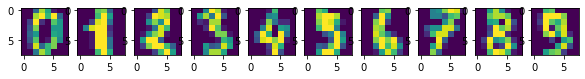

In [16]:
plt.figure(figsize=(10, 10))

for i in range(10):
    img = X[y==i][0].reshape(8, 8)
    plt.subplot(1, 10, i+1)
    plt.imshow(img)

### 2.2 Перебор классификаторов (3 балла)

В этом задании вам снова придется перебрать несколько классификаторов, но теперь мы обратим внимание на другие гиперпараметры и их влияние на качество классификации, кстати опять `accuracy`.

Сделайте кроссвалидацию на 10 фолдах, указав `cv=10` для следующих классификаторов:

- DecisionTreeClassifier с параметрами по-умолчанию
- BaggingClassifier с 100 деревьвев
- BaggingClassifier с 100 деревьев, НО с ограничением на максимальное количество признаков, участвующих при обучении каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков.
- BaggingClassifier с 100 деревьев, НО с ограничением на количество признаков участвующих в разбиении для каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков. Это отличается от предыдущей модели тем, где ограничивается `max_features`. Читайте документацию :trollface:
- обычный случайный лес со 100 деревьями

In [17]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [18]:
cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=cv, scoring='accuracy').mean()

0.8525294847920547

In [19]:
cross_val_score(BaggingClassifier(n_estimators=100, random_state=42), X, y, cv=cv, scoring='accuracy').mean()

0.9493575418994412

In [58]:
cross_val_score(BaggingClassifier(n_estimators=100, max_features=int(np.sqrt(X.shape[1])), random_state=42), X, y, cv=cv, scoring='accuracy').mean()

0.9577004023522129

In [21]:
d_tree = DecisionTreeClassifier(max_features=int(np.sqrt(X.shape[1])), random_state=42)

cross_val_score(BaggingClassifier(base_estimator=d_tree, n_estimators=100, random_state=42), X, y, cv=cv, scoring='accuracy').mean()

0.9782991930477964

In [22]:
cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X, y, cv=cv, scoring='accuracy').mean()

0.9794196151458723

### 2.3 В чём разница? (3 балла)

Ответье на вопрос: 

Странно то как? Почему ограничение на количество признаков в разбиении дерева и ограничение в количестве признаков для построения каждого дерева в BaggingClasifier дало СОВСЕМ разный результат в качестве предсказания? В чем магия?

![](https://i.ytimg.com/vi/_5GWMIAHc08/hqdefault.jpg)

Дело в том, что в первом случае мы испльзуем $\sqrt{N}$ признаков для построения всего дерева, а во втором - каждого ветвления, соответственно, во втором случае деревья получаются более рандомизированными, а значит, менее скореллированными, что и дает лучший результат

### 2.4 Количество деревьев (2 балла)

Сделайте перебор количества деревьев для `RandomForestClassifier`. Сохраните качества кросс валидации на 10 фолдах для `[1,5,10,15,50,100,150,200,300]` количества деревьев. Нарисуйте график, где по оси x - количество деревьев, а по оси y - качество. При каком количестве деревьев получается самое хорошее качество?

In [23]:
score = []
trees_num = [1,5,10,15,50,100,150,200,300]

for n_trees in trees_num:
    score.append(cross_val_score(RandomForestClassifier(n_estimators=n_trees, random_state = 42), X, y, cv=cv, scoring='accuracy').mean())
    
score

[0.790707635009311,
 0.9153941651148354,
 0.9488019863438858,
 0.9577001862197392,
 0.9760800744878957,
 0.9794196151458723,
 0.9805307262569833,
 0.9783054003724395,
 0.9771880819366853]

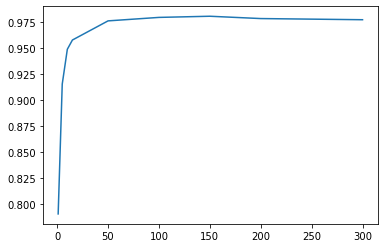

In [24]:
plt.plot(trees_num, score)

### 2.5 Количество признаков  (2 балла)

Переберите теперь максимальное количество признаков для `RandomForestClassifier` на 100 деревьях, от 1 до 64 с шагом 5. Постройте график качества по кроссвалидации на 10 фолдах.

In [26]:
n_features = range(1, 64, 5)
score = []

for n in n_features:
    score.append(cross_val_score(RandomForestClassifier(n_estimators=100, max_features=n, random_state = 42), X, y, cv=cv, scoring='accuracy').mean())
    
score

[0.9738516449410305,
 0.9760738671632525,
 0.9782991930477964,
 0.9716108007448788,
 0.9760707635009311,
 0.9716139044072005,
 0.9693885785226566,
 0.9654996896337679,
 0.9643823711980136,
 0.9632619490999378,
 0.9571477343265051,
 0.9538144009931718,
 0.9526939788950962]

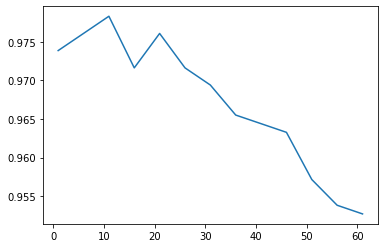

In [27]:
plt.plot(n_features, score)

[0.9365583410708759, 0.9610383782110802, 0.971058495821727, 0.9732822655524604, 0.9744011142061281, 0.9749566697616837, 0.9755122253172391, 0.9755122253172391, 0.9755122253172391, 0.9755122253172391, 0.9755122253172391, 0.9755122253172391, 0.9755122253172391, 0.9755122253172391, 0.9755122253172391, 0.9755122253172391, 0.9755122253172391, 0.9755122253172391, 0.9755122253172391, 0.9755122253172391, 0.9755122253172391, 0.9755122253172391, 0.9755122253172391]


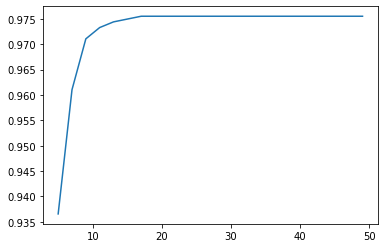

In [63]:
depth = range(5, 50, 2)
score = []

for n in depth:
    score.append(cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=n, random_state = 42), X, y, cv=cv, scoring='accuracy').mean())

print(score)
plt.plot(depth, score)

### 2.5 Вопросы по RandomForest (8 баллов)

Ответьте на вопросы:

- Что происходит с ростом числа деревьев у случайного леса. Можно ли просто всегда брать 5000 деревьев и быть счастливым?
- Как зависит качество предсказания в дереве в зависимости от max_features?
- Почему качество зависит от max_features?
- Как глубина деревьев влияет на качество случайного леса?

1) Сначала происходит резкий рост качества предсказаний, но потом функция начинает медленно убывать, т.е. всегда нужно стараться подобрать оптимальное количество деревьев. Большее количество деревьев, как правило, показывают лучшее качество, чем меньшее, однако большое количество деревьев может привести к переобучению.

2) С ростом числа признаков качество предсказаний начинает достаточно быстро ухудшаться, связанно это с тем, что деревья становятся менее разнообразными и более скоррелированными. И тут тоже нужно стараться подобрать оптимальное значение.

3) В принципе, ответ на этот вопрос я дал выше: меньше признаков на дерево - рандомизация леса выше, больше признаков - меньше.

4) Качество случайного леса улучшается с увеличением глубины деревьев т.к. разбиения получаются более подробные, однако и тут есть предел оптимальной глубины

![](https://habrastorage.org/web/ad8/366/a44/ad8366a4469346c6b2e1306495b05d1a.jpg)